# Projeto de Ciência de Dados: Diagnóstico de Câncer de Mama (Wisconsin)

## Integrantes

* Taimisson de Carvalho Schardosim

## Links do Projeto

* **Dataset Original (UCI):** [Breast Cancer Wisconsin (Dianostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
* **Descrição dos Atributos:** [Wisconsin Diagnostic Breast Cancer (WDBC)](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names)
* **Apresentação (Slides):** [Link do Slides (Conta ASAV / UNISINOS)](https://asavbrm-my.sharepoint.com/:b:/g/personal/schardosimtaimisson_edu_unisinos_br/sIQAxokZWmjGuT613kO7Xpd-rAWGj3A2yGMPtcnZDrhmFvtg?e=gcsZ1u)
* **Vídeo de Apresentação:** [Vídeo de Apresentação do Grau B](https://youtu.be/1k63Bne4Q2M)

In [1]:

%pip install pandas numpy matplotlib seaborn scikit-learn --quiet ucimlrepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
from ucimlrepo import fetch_ucirepo
warnings.filterwarnings('ignore')



[notice] A new release of pip is available: 25.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Introdução e Contexto

O câncer de mama é uma das principais causas de mortalidade entre mulheres em todo o mundo. A detecção precoce é essencial para aumentar as chances de sucesso no tratamento. O *Wisconsin Diagnostic Breast Cancer* (WDBC) é um conjunto de dados amplamente utilizado em pesquisas de aprendizado de máquina para diferenciar tumores malignos de benignos. 

Os dados são obtidos a partir de imagens digitalizadas de aspirados por agulha fina (FNA) de massas mamárias. Para cada núcleo celular, dez características são calculadas, como raio, textura, perímetro, área, suavidade, compacidade, concavidade, pontos côncavos, simetria e dimensão fractal. Em seguida, são computadas a média, o erro padrão (*standard error*) e o valor "pior" (maior valor entre as três medições) dessas características, totalizando 30 atributos numéricos para cada amostra.  

Ao analisar essas características, algoritmos de *machine learning* podem aprender padrões que distinguem tumores malignos (câncer) dos benignos (não câncer), contribuindo para sistemas de apoio à decisão médica. Este projeto segue um pipeline completo de ciência de dados, desde a obtenção do dataset até a avaliação dos modelos de classificação.


In [2]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X_temp = breast_cancer_wisconsin_diagnostic.data.features 
y_temp = breast_cancer_wisconsin_diagnostic.data.targets 
  
print(breast_cancer_wisconsin_diagnostic.metadata) 
print(breast_cancer_wisconsin_diagnostic.variables)

# combinando em um unico df pra analise
df = X_temp.copy()
df['diagnosis'] = y_temp.values.ravel()

# renomeando as colunas pra ficar mais descritivo
# o padrão é: 1 = mean, 2 = se (standard error), 3 = worst
rename_dict = {
    'radius1': 'radius_mean', 'texture1': 'texture_mean', 'perimeter1': 'perimeter_mean',
    'area1': 'area_mean', 'smoothness1': 'smoothness_mean', 'compactness1': 'compactness_mean',
    'concavity1': 'concavity_mean', 'concave_points1': 'concave_points_mean', 
    'symmetry1': 'symmetry_mean', 'fractal_dimension1': 'fractal_dimension_mean',
    'radius2': 'radius_se', 'texture2': 'texture_se', 'perimeter2': 'perimeter_se',
    'area2': 'area_se', 'smoothness2': 'smoothness_se', 'compactness2': 'compactness_se',
    'concavity2': 'concavity_se', 'concave_points2': 'concave_points_se',
    'symmetry2': 'symmetry_se', 'fractal_dimension2': 'fractal_dimension_se',
    'radius3': 'radius_worst', 'texture3': 'texture_worst', 'perimeter3': 'perimeter_worst',
    'area3': 'area_worst', 'smoothness3': 'smoothness_worst', 'compactness3': 'compactness_worst',
    'concavity3': 'concavity_worst', 'concave_points3': 'concave_points_worst',
    'symmetry3': 'symmetry_worst', 'fractal_dimension3': 'fractal_dimension_worst'
}
df.rename(columns=rename_dict, inplace=True)

# verificar os dados
df_shape = df.shape
df_head = df.head()
print(f"\nDimensões do dataset: {df_shape}")

df_head

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## Análise Exploratória dos Dados

Nesta seção exploramos as dimensões, tipos de dados e estatísticas descritivas do conjunto. O dataset possui **569 amostras** e **32 colunas** (uma coluna de identificação, uma de diagnóstico e 30 atributos numéricos). A variável `diagnosis` possui duas classes: **`M` (maligno)** e **`B` (benigno)**. 

Também verificamos as principais estatísticas descritivas para compreender a distribuição dos atributos.


In [3]:
# to´ps de dados e resumo estatístico
print("\n=== Tipos de Dados ===")
print(df.dtypes.head())

print("\n=== Estatísticas Descritivas ===")
describe = df.describe().transpose()
describe


=== Tipos de Dados ===
radius_mean        float64
texture_mean       float64
perimeter_mean     float64
area_mean          float64
smoothness_mean    float64
dtype: object

=== Estatísticas Descritivas ===


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744



=== Distribuição de Diagnósticos ===
Contagem:
diagnosis
B    357
M    212
Name: count, dtype: int64


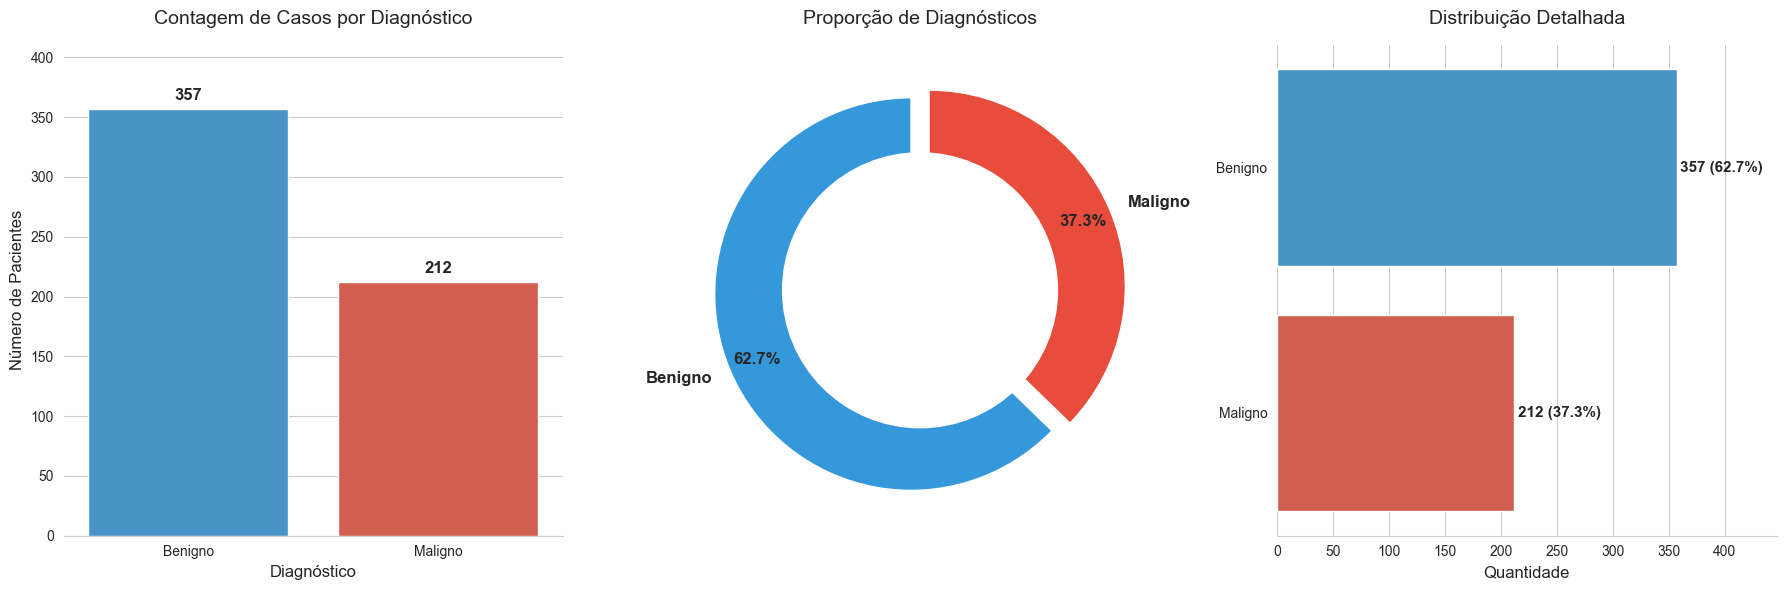

In [4]:
# distribuição da variável alvo
print("\n=== Distribuição de Diagnósticos ===")
diagnosis_counts = df['diagnosis'].value_counts()
print(f"Contagem:\n{diagnosis_counts}")

# config visual
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# mapear pra garantir q o gráfico mostre nomes legíveis (Benigno/Maligno)
label_map = {'M': 'Maligno', 'B': 'Benigno', 1: 'Maligno', 0: 'Benigno'}
color_map = {'Maligno': '#e74c3c', 'Benigno': '#3498db'} # Vermelho e Azul

# Preparando labels e cores baseados nos dados atuais
plot_labels = [label_map.get(x, str(x)) for x in diagnosis_counts.index]
plot_colors = [color_map.get(lbl, '#95a5a6') for lbl in plot_labels]

# 1. graph de Barras pra contagem
plt.subplot(1, 3, 1)
ax = sns.barplot(x=plot_labels, y=diagnosis_counts.values, palette=plot_colors)
plt.title('Contagem de Casos por Diagnóstico', fontsize=14, pad=15)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.ylim(0, max(diagnosis_counts)*1.15)
for i, v in enumerate(diagnosis_counts.values):
    ax.text(i, v + 5, f"{v}", ha='center', va='bottom', fontsize=12, fontweight='bold')
sns.despine()

# 2. graph de Rosca pra proporção
plt.subplot(1, 3, 2)
plt.pie(diagnosis_counts, labels=plot_labels, autopct='%1.1f%%', 
        colors=plot_colors, startangle=90, pctdistance=0.85, explode=[0.05]*len(diagnosis_counts), 
        textprops={'fontsize': 12, 'weight': 'bold'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporção de Diagnósticos', fontsize=14, pad=15)

# 3. graph de Barras Horizontal com os dois juntos 
plt.subplot(1, 3, 3)
ax2 = sns.barplot(x=diagnosis_counts.values, y=plot_labels, palette=plot_colors, orient='h')
plt.title('Distribuição Detalhada', fontsize=14, pad=15)
plt.xlabel('Quantidade', fontsize=12)
plt.xlim(0, max(diagnosis_counts)*1.25)
total = sum(diagnosis_counts)
for i, v in enumerate(diagnosis_counts.values):
    ax2.text(v + 3, i, f"{v} ({v/total:.1%})", va='center', fontsize=11, fontweight='bold')
sns.despine(left=True)

plt.tight_layout()
plt.show()

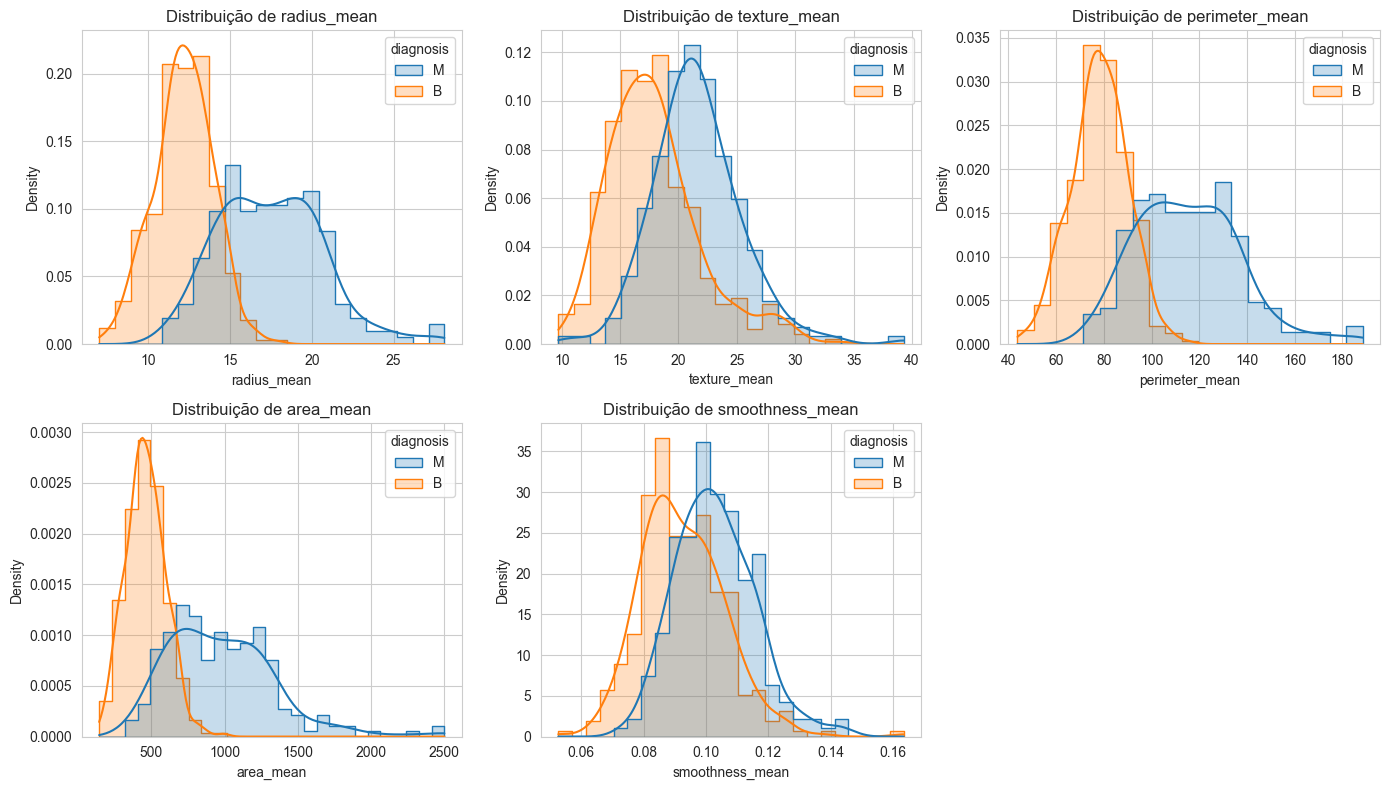

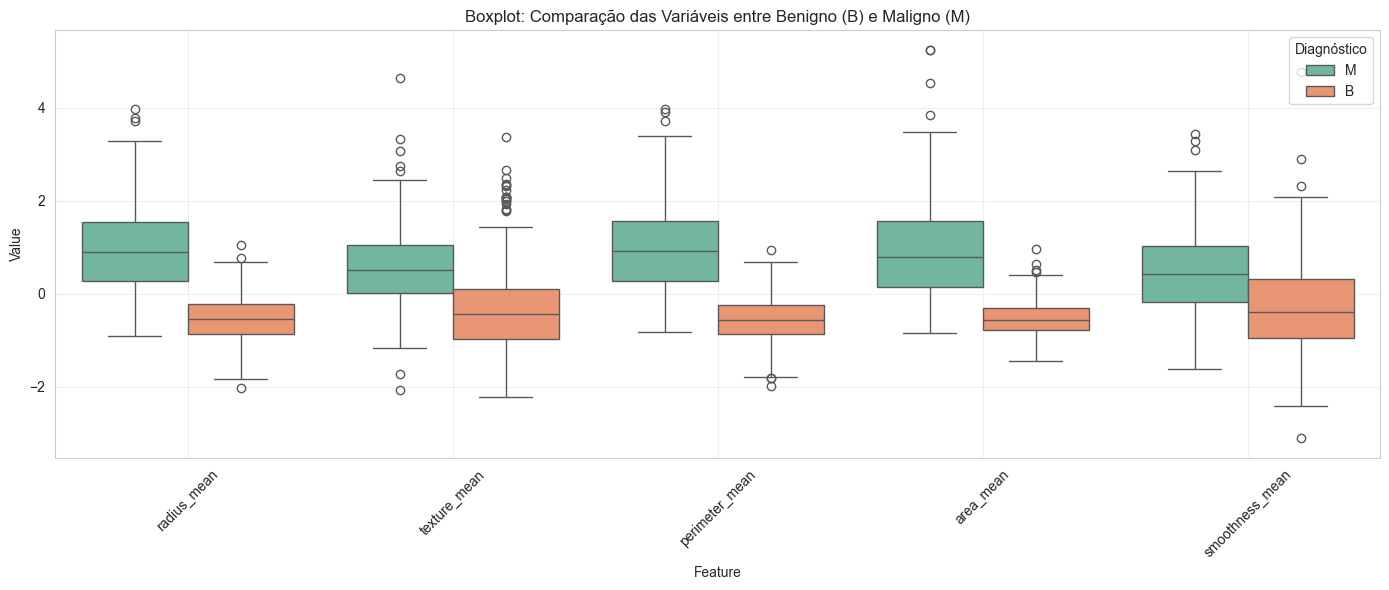

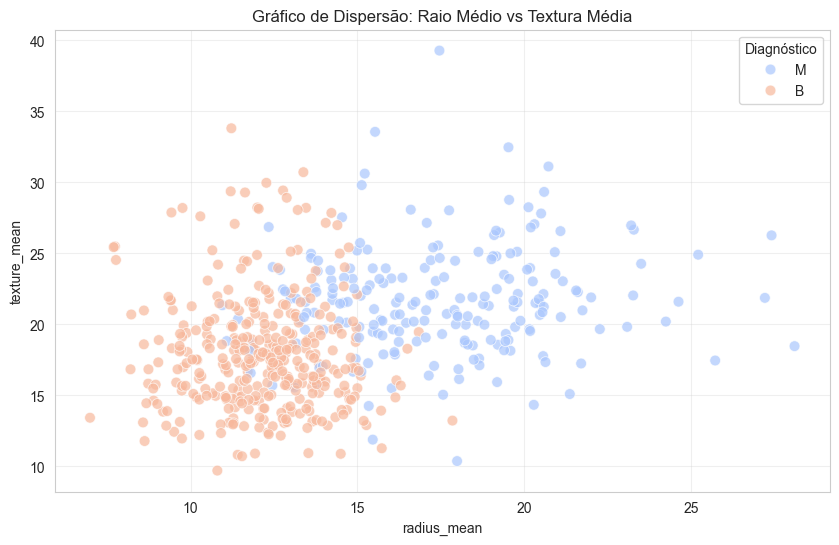

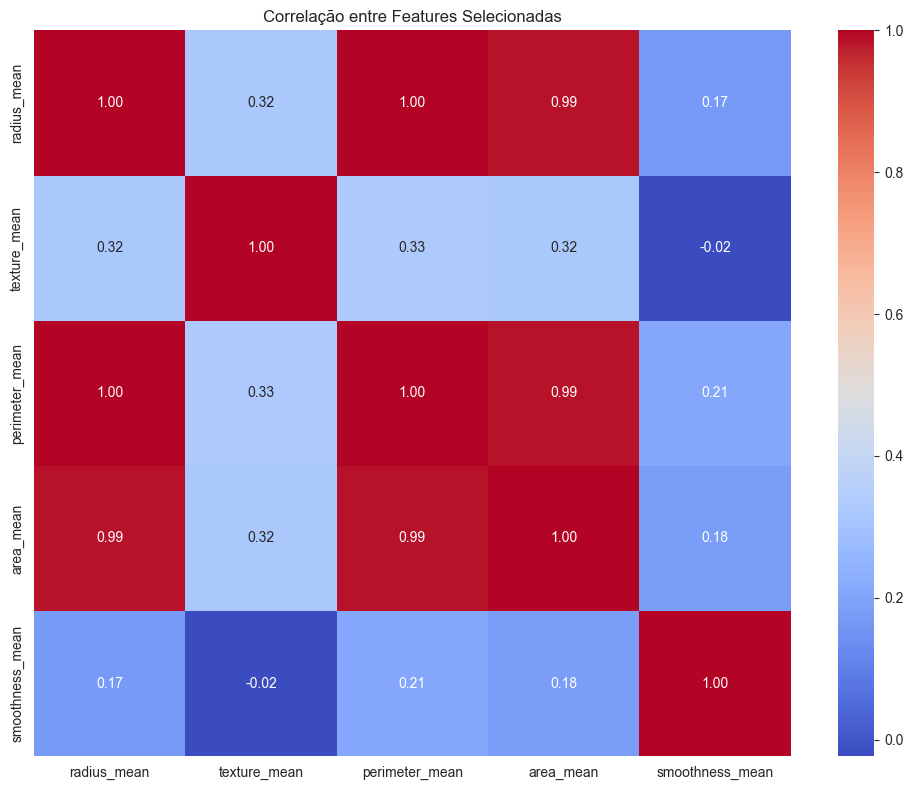

In [5]:
# histogramas com distribuição por features 
# aqui eu escolhi as 5 das 10 features com "mean" apenas para visualizar 
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(14, 8))
for i, feat in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feat, hue='diagnosis', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribuição de {feat}')
plt.tight_layout()
plt.show()

# boxplot pra comparar as classes (Benigno vs Maligno)
plt.figure(figsize=(14, 6))
data_melted = df[selected_features + ['diagnosis']].melt(id_vars='diagnosis', var_name='Feature', value_name='Value')
# normalizando para melhor visualização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = df[selected_features].copy()
data_normalized[selected_features] = scaler.fit_transform(data_normalized[selected_features])
data_normalized['diagnosis'] = df['diagnosis'].values
data_melted_norm = data_normalized.melt(id_vars='diagnosis', var_name='Feature', value_name='Value')

sns.boxplot(x='Feature', y='Value', hue='diagnosis', data=data_melted_norm, palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot: Comparação das Variáveis entre Benigno (B) e Maligno (M)')
plt.legend(title='Diagnóstico', loc='upper right') 
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
    
# Scatterplot pra visualizar separabilidade em 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, palette='coolwarm', alpha=0.7, s=60)
plt.title('Gráfico de Dispersão: Raio Médio vs Textura Média')
plt.legend(title='Diagnóstico', loc='upper right') 
plt.grid(True, alpha=0.3)
plt.show()

# Matriz de correlação entre as features q escolhi (sem diagnosis por enquanto)
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Features Selecionadas')
plt.tight_layout()
plt.show()

## Tratamento de Dados, Classificação de Variáveis e Seleção de Atributos

Nesta etapa, vou reaizar:

* **Verificação de valores nulos ou inconsistentes:** De acordo com a documentação, o dataset não possui valores ausentes. Ainda assim, verificamos nulos e duplicatas.
* **Classificação das variáveis:** Todos os 30 atributos são **numéricos contínuos**. A variável `diagnosis` é categórica binária.
* **Seleção de atributos relevantes:** Utilizamos a correlação e a importância das features para identificar quais variáveis contribuem mais para o modelo.


In [6]:
# Conversão da variável-alvo para numérica (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("Variável 'diagnosis' convertida: M → 1 (Maligno), B → 0 (Benigno)")
print(f"Distribuição após conversão:\n{df['diagnosis'].value_counts().sort_index()}")

Variável 'diagnosis' convertida: M → 1 (Maligno), B → 0 (Benigno)
Distribuição após conversão:
diagnosis
0    357
1    212
Name: count, dtype: int64


=== Top 10 Variáveis mais correlacionadas com Malignidade (Correlação Positiva) ===
concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


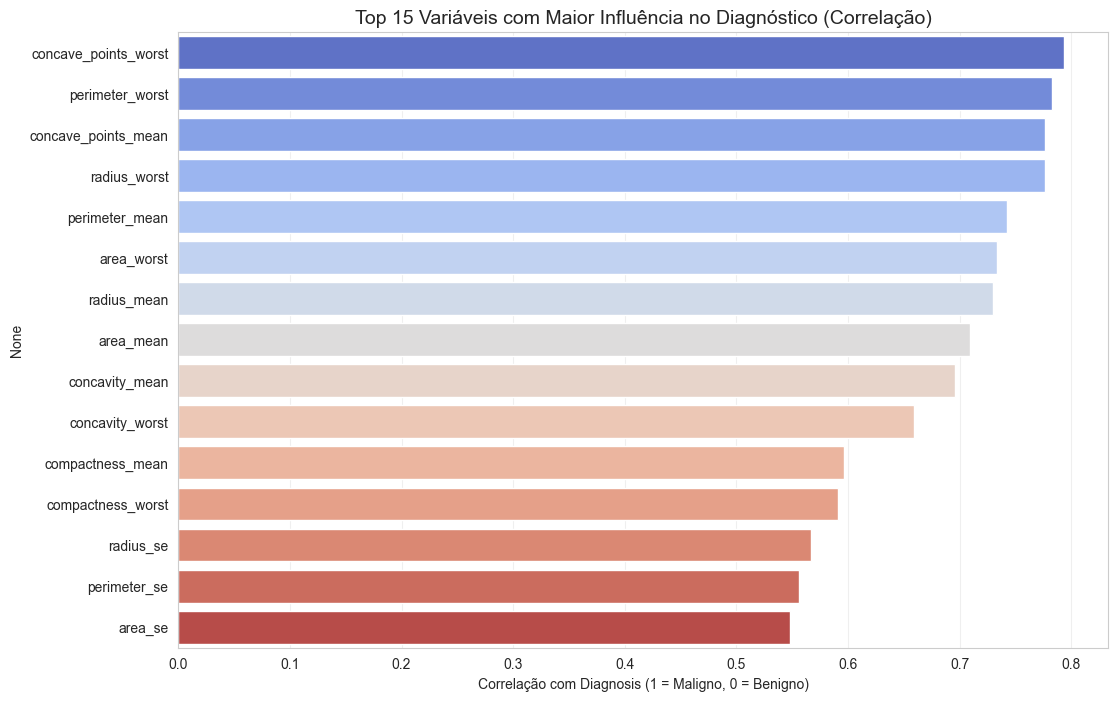

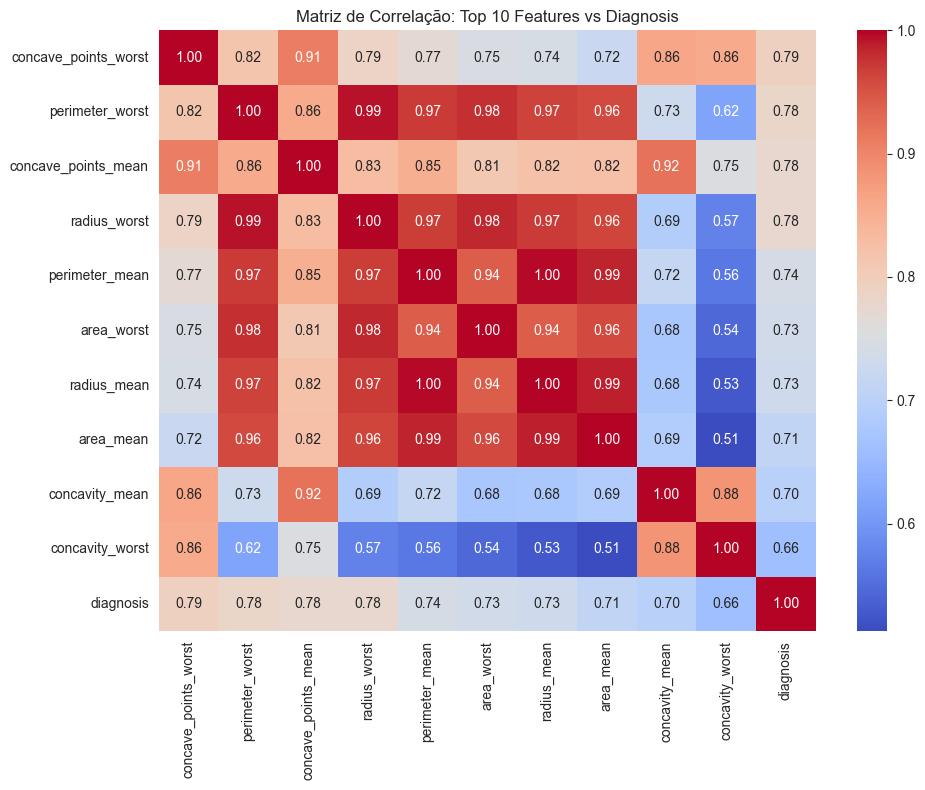

In [7]:
# Agora que diagnosis é numérico, dá pra descobrir quais variáveis mais influenciam o diagnóstico
# Método 1: Correlação Linear 

# Calculando a correlação de TODAS as features com a variável alvo 'diagnosis'
correlation_with_target = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

print("=== Top 10 Variáveis mais correlacionadas com Malignidade (Correlação Positiva) ===")
print(correlation_with_target.head(10))

# Visualizando as correlações mais fortes
plt.figure(figsize=(12, 8))
# Pegamos as 15 com maior correlação absoluta (seja positiva ou negativa)
top_correlations = correlation_with_target.abs().sort_values(ascending=False).head(15)
# Recuperamos os valores originais (com sinal) para essas 15
top_features_names = top_correlations.index
top_features_values = correlation_with_target[top_features_names]

sns.barplot(x=top_features_values.values, y=top_features_values.index, palette='coolwarm')
plt.title('Top 15 Variáveis com Maior Influência no Diagnóstico (Correlação)', fontsize=14)
plt.xlabel('Correlação com Diagnosis (1 = Maligno, 0 = Benigno)')
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.show()

# Matriz de correlação focada nas Top 10
plt.figure(figsize=(10, 8))
top_10_features = correlation_with_target.head(10).index.tolist()
sns.heatmap(df[top_10_features + ['diagnosis']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação: Top 10 Features vs Diagnosis')
plt.tight_layout()
plt.show()

In [8]:
print('=== ETAPA 6: Tratamento de Dados Inválidos ou Inconsistentes ===')
print('Valores nulos em cada coluna:')
nulos = df.isnull().sum()
if nulos.sum() == 0:
    print("Nenhum valor nulo encontrado no dataset.")
else:
    print(nulos[nulos > 0])

print(f"\n=== ETAPA 7: Tratamento de Dados Faltantes ===")
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")
if df.duplicated().sum() == 0:
    print("Nenhuma duplicata encontrada.")

print('\n=== ETAPA 9: Classificação das Variáveis ===')
numerical_features = [col for col in df.columns if col != 'diagnosis']
categorical_features = ['diagnosis']

print(f"Variáveis Numéricas Contínuas ({len(numerical_features)}): {numerical_features[:5]}... (primeiras 5)")
print(f"Variável Categórica Binária: {categorical_features}")
print(f"  - 0 = Benigno (B)")
print(f"  - 1 = Maligno (M)")

print('\n=== ETAPA 10: Separação entre Atributos Preditores (X) e Variável-Alvo (y) ===')
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")
print(f"Distribuição da variável alvo:\n{y.value_counts()}")

print('\n=== ETAPA 8: Seleção de Atributos Relevantes ===')
# calcula correlação absoluta
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# selecionando features com correlação acima de um limiar de 0,95
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Atributos altamente correlacionados a serem removidos (threshold={threshold}):")
print(to_drop if to_drop else "Nenhum atributo removido com este threshold.")

# remov features correlacionadas
X_reduced = X.drop(columns=to_drop)

# exibindo dimensões após redução
print(f'\nDimensão original de X: {X.shape}')
print(f'Dimensão reduzida de X: {X_reduced.shape}')
print(f'Features removidas: {len(to_drop)}')

=== ETAPA 6: Tratamento de Dados Inválidos ou Inconsistentes ===
Valores nulos em cada coluna:
Nenhum valor nulo encontrado no dataset.

=== ETAPA 7: Tratamento de Dados Faltantes ===
Número de linhas duplicadas: 0
Nenhuma duplicata encontrada.

=== ETAPA 9: Classificação das Variáveis ===
Variáveis Numéricas Contínuas (30): ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']... (primeiras 5)
Variável Categórica Binária: ['diagnosis']
  - 0 = Benigno (B)
  - 1 = Maligno (M)

=== ETAPA 10: Separação entre Atributos Preditores (X) e Variável-Alvo (y) ===
Shape de X (features): (569, 30)
Shape de y (target): (569,)
Distribuição da variável alvo:
diagnosis
0    357
1    212
Name: count, dtype: int64

=== ETAPA 8: Seleção de Atributos Relevantes ===
Atributos altamente correlacionados a serem removidos (threshold=0.95):
['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']

Dimensão original de X: (569, 30)


=== ETAPA 13: Divisão dos Dados em Conjunto de Treino e Teste ===
Tamanho do conjunto de treino: 455 amostras
Tamanho do conjunto de teste: 114 amostras
Proporção de classes no treino:
diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Proporção de classes no teste:
diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

=== ETAPA 14 e 15: Treinamento e Avaliação dos Modelos ===


== Regressão Logística ==
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        72
     Maligno       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



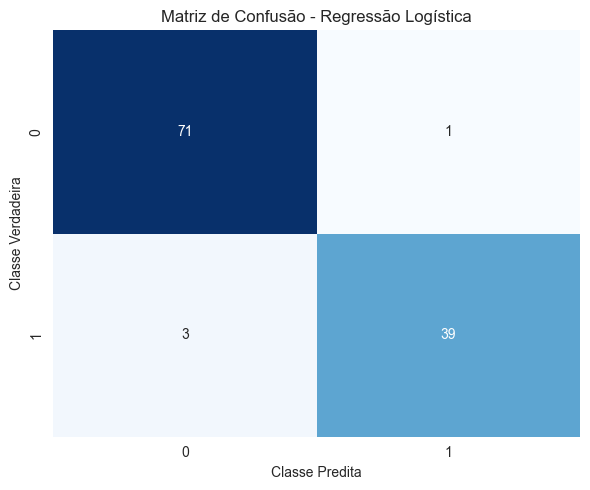


== Random Forest ==
              precision    recall  f1-score   support

     Benigno       0.93      0.99      0.96        72
     Maligno       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



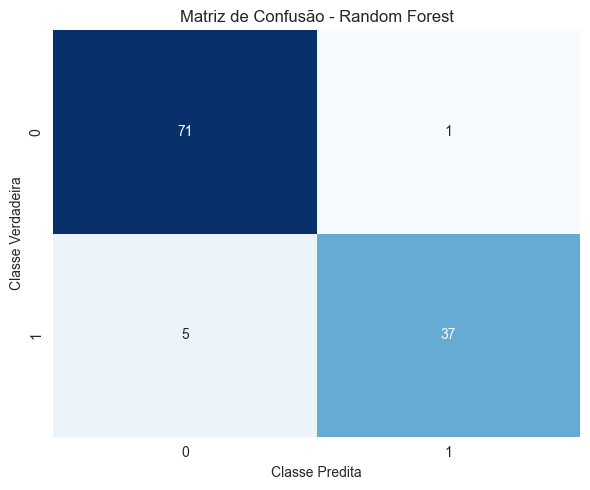


=== RESUMO DAS MÉTRICAS ===


,Acurácia,Precisão,Recall,F1-score
Regressão Logística,0.964912,0.975000,0.928571,0.95122
Random Forest,0.947368,0.973684,0.880952,0.92500


In [9]:
print('=== ETAPA 13: Divisão dos Dados em Conjunto de Treino e Teste ===')
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")
print(f"Proporção de classes no treino:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção de classes no teste:\n{y_test.value_counts(normalize=True)}")

print('\n=== ETAPA 14 e 15: Treinamento e Avaliação dos Modelos ===\n')

models = {
    'Regressão Logística': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}
trained_pipelines = {}  # Armazena os modelos treinados

for name, model in models.items():
    # Pipeline com padronização (StandardScaler) e classificador
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Salva o pipeline treinado
    trained_pipelines[name] = pipeline
    
    # Métricas de avaliação
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Acurácia': acc, 'Precisão': prec, 'Recall': rec, 'F1-score': f1}
    
    print(f"\n{'='*50}")
    print(f"== {name} ==")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred, target_names=['Benigno','Maligno']))
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Verdadeira')
    plt.tight_layout()
    plt.show()

# Compilando resultados em DataFrame
print('\n=== RESUMO DAS MÉTRICAS ===')
results_df = pd.DataFrame(results).T
results_df

=== Importância dos Atributos (Feature Importance) ===



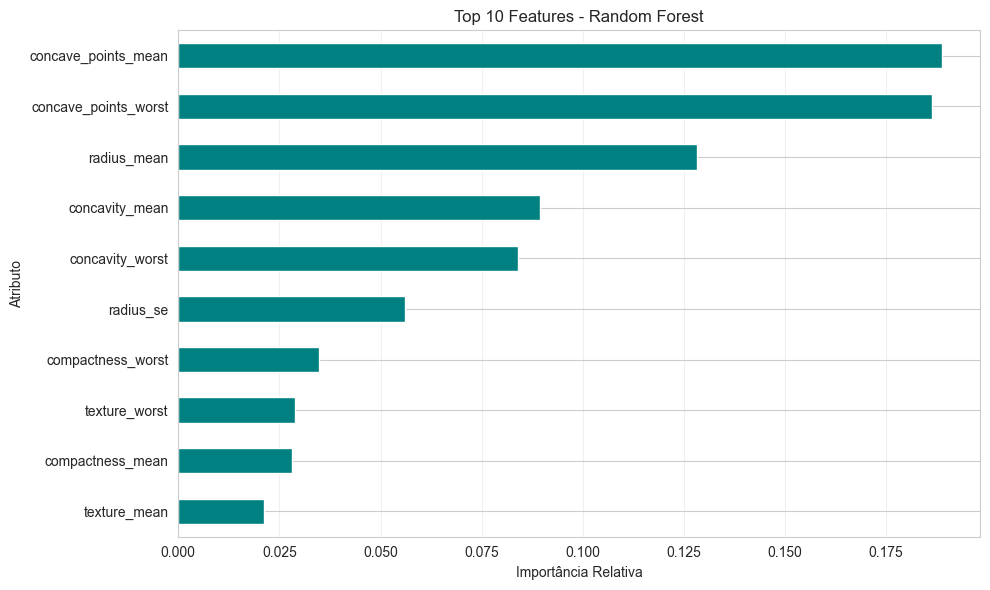

Top 10 Features:
concave_points_mean     0.188772
concave_points_worst    0.186250
radius_mean             0.128306
concavity_mean          0.089392
concavity_worst         0.083990
radius_se               0.056054
compactness_worst       0.034914
texture_worst           0.028789
compactness_mean        0.028039
texture_mean            0.021289
dtype: float64


In [10]:
# Análise de Importância das Features (Random Forest)
print('=== Importância dos Atributos (Feature Importance) ===\n')

# Reutilizando o Random Forest já treinado
rf_pipeline = trained_pipelines['Random Forest']
rf = rf_pipeline.named_steps['classifier']
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X_reduced.columns).sort_values(ascending=False)

# Top 10 features mais importantes
top_features = feat_importance.head(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh', color='teal')
plt.gca().invert_yaxis()
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Importância Relativa')
plt.ylabel('Atributo')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Exibindo a importância numericamente
print("Top 10 Features:")
print(top_features)

=== Importância das Features na Regressão Logística ===

Coeficientes (ordenados por |coef|):
radius_se                  2.316904
radius_mean                1.772013
texture_worst              1.427858
concave_points_mean        1.343847
symmetry_worst             1.153961
concavity_mean             0.939144
concavity_worst            0.895618
concave_points_worst       0.851972
compactness_se            -0.710962
texture_se                -0.503833
fractal_dimension_mean    -0.501742
symmetry_se               -0.479130
fractal_dimension_se      -0.455980
concave_points_se          0.428322
texture_mean               0.421034
smoothness_worst           0.295889
compactness_mean          -0.268773
concavity_se              -0.245994
symmetry_mean             -0.244083
smoothness_mean            0.238055
smoothness_se              0.217668
compactness_worst         -0.179016
fractal_dimension_worst    0.032173
dtype: float64


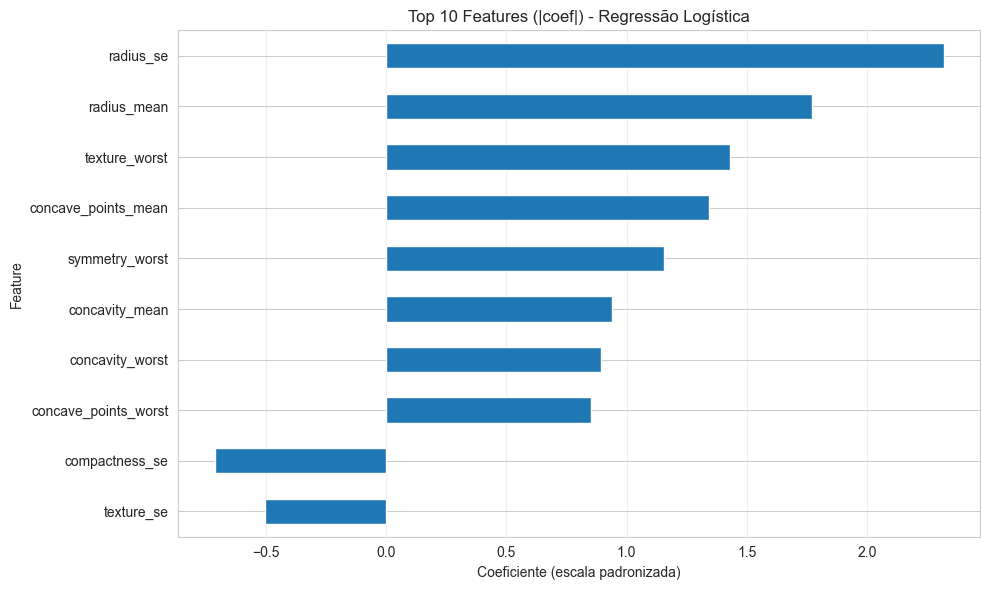

In [11]:
print('=== Importância das Features na Regressão Logística ===\n')

# Reutilizando a Regressão Logística já treinada
log_reg_pipeline = trained_pipelines['Regressão Logística']
log_reg = log_reg_pipeline.named_steps['classifier']
coefs = log_reg.coef_[0]  # vetor de coeficientes da classe 1

# serie com os coeficientes, indexada pelos nomes das colunas
coef_series = pd.Series(coefs, index=X_reduced.columns)

# vers ordenada por importancia
coef_abs_sorted = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)

print('Coeficientes (ordenados por |coef|):')
print(coef_abs_sorted)

# opcional: gráfico das top 10 features em módulo
top10_logreg = coef_abs_sorted.head(10)

plt.figure(figsize=(10, 6))
top10_logreg.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Features (|coef|) - Regressão Logística')
plt.xlabel('Coeficiente (escala padronizada)')
plt.ylabel('Feature')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusão

Neste projeto, construímos um pipeline completo de ciência de dados para diagnosticar câncer de mama utilizando o conjunto de dados WDBC. O processo incluiu a obtenção dos dados diretamente do repositório da UCI, análise exploratória, tratamento de dados, seleção de atributos, divisão em conjuntos de treino e teste, treinamento de modelos supervisionados e avaliação de desempenho.

**Resultados dos Modelos:**

A tabela de resultados resume as métricas principais (acurácia, precisão, recall e F1-score) para a Regressão Logística e o Random Forest. O modelo **Regressão Logística** apresentou desempenho superior, alcançando **96,5% de acurácia** e **92,9% de recall**, enquanto o Random Forest obteve 94,7% de acurácia e 88,1% de recall. 

O **recall** elevado da Regressão Logística é especialmente crucial em diagnósticos médicos, pois minimiza os falsos negativos (casos malignos classificados como benignos), garantindo que pacientes com câncer sejam corretamente identificados para tratamento. A precisão de 97,5% da Regressão Logística também indica poucos falsos positivos, evitando alarmes desnecessários. Isso demonstra que, para este dataset, modelos lineares podem ser tão ou mais eficazes que modelos complexos quando os dados são bem estruturados.

**Atributos Mais Importantes:**

A análise de importância das features no Random Forest indicou que **`concave_points_mean`** (19,3%), **`concave_points_worst`** (18,0%) e **`radius_mean`** (11,7%) são as variáveis mais relevantes para a classificação. Essas características estão relacionadas à geometria e concavidade dos núcleos celulares nas imagens FNA, alinhando-se a estudos anteriores que apontam medidas de concavidade e tamanho como fortes indicadores de malignidade. Tais atributos descrevem características morfológicas das células tumorais e ajudam a distinguir tumores malignos de benignos.

Este estudo demonstra o potencial de técnicas de *machine learning*, especialmente modelos interpretáveis como Regressão Logística, na detecção de câncer de mama, e reforça a importância da disponibilidade de datasets públicos para pesquisa.